In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
burrelloResDf = pd.read_csv("/home/yhbedoya/Repositories/SHM-MAE/ReplicaBurrello2021/Burrello2021Results.csv", index_col=0)
burrelloResDf

,model,MSE,MAE,MAPE,R2,numFeatures
0,LR,1.174802,0.784562,71.972071,-0.061890,5
1,RF,1.226447,0.766703,70.333783,-0.108572,5
2,KNR,1.115548,0.731987,67.149055,-0.008331,5
3,MLP,1.120624,0.742438,68.107857,-0.012919,5
4,SVR,1.286243,0.750760,68.871220,-0.162620,5
0,LR,1.185964,0.788368,72.321227,-0.071979,10
1,RF,0.948237,0.665678,61.066174,0.142900,10
2,KNR,0.907866,0.653616,59.959715,0.179390,10
3,MLP,1.122275,0.743326,68.189293,-0.014412,10
4,SVR,1.259599,0.749015,68.711145,-0.138537,10


In [26]:
burrelloResDf[burrelloResDf["model"]=="SVR"]

,model,MSE,MAE,MAPE,R2,numFeatures
4,SVR,1.286243,0.750760,68.871220,-0.162620,5
4,SVR,1.259599,0.749015,68.711145,-0.138537,10
4,SVR,1.203091,0.733078,67.249172,-0.087460,15
4,SVR,1.108132,0.707593,64.911328,-0.001627,20
4,SVR,1.085703,0.702371,64.432222,0.018646,25
4,SVR,1.156682,0.712377,65.350155,-0.045512,50
4,SVR,1.186858,0.724050,66.421005,-0.072787,75
4,SVR,1.187100,0.724231,66.437610,-0.073006,100
4,SVR,1.636376,0.893967,82.008420,-0.479101,150
4,SVR,1.708260,0.933347,85.620957,-0.544076,200


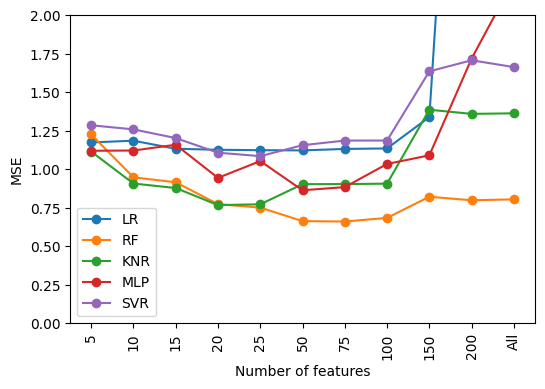

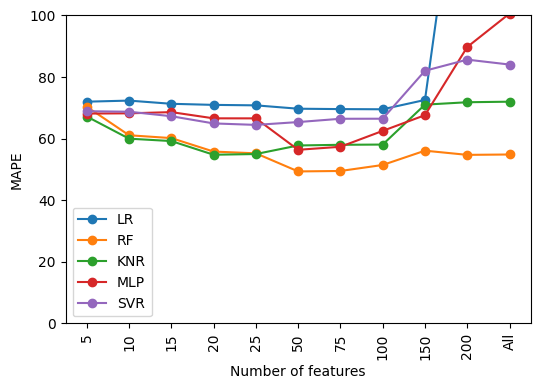

In [21]:
methods = burrelloResDf["model"].unique()
plt.rcParams['figure.figsize'] = [6, 4]
for metric in ["MSE", "MAPE"]:
    for method in methods:
        versionResDf = burrelloResDf[burrelloResDf["model"] == method]
        x_categories = versionResDf["numFeatures"].unique()

        #pltDf = resultsTimeDf[resultsTimeDf["threshold"]==thresholdOpt]
        #x_categories = pltDf["sizeMovingAverage"]

        # Create the plot
        
        plt.plot(x_categories, versionResDf[metric], marker='o', label=method)
        #plt.plot(x_categories, pltDf["sensitivity"], marker='v', label='sensitivity')
        #plt.plot(x_categories, pltDf["specificity"], marker='s', label='specificity')

    # Add labels and title
    if metric == "MSE":
        plt.ylim(0, 2)
    else:
        plt.ylim(0, 100)
    plt.xlabel('Number of features')
    plt.ylabel(metric)
    #plt.title(f'Statistics for Threshold Mean + {thresholdOpt}')

    # Add legend
    plt.legend()
    plt.xticks(x_categories, rotation='vertical')
    # Display the plot
    plt.show()